<a href="https://colab.research.google.com/github/anilansoliya/movielens/blob/main/EDA%20and%20Visualization%20movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data cleaning*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/u.data', sep="\t", encoding = 'latin-1',header=None)
data_column_names = ['user id', 'movie id', 'rating', 'timestamp']
data.columns = data_column_names

In [ ]:
items = pd.read_csv('/content/u.item',sep="|", encoding = 'latin-1',header = None)
items_column_names = ['movie id ', 'movie title' , 'release date' , 'video release date',
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' ,' Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
items.columns = items_column_names

In [ ]:
items['movie id'] = items.iloc[:,0]

In [ ]:
items['year'] = pd.to_datetime(items['release date']).dt.year

In [ ]:
items.drop(items.columns[[0,2,3,4]], axis=1,inplace = True)

In [ ]:
items.dropna(axis=0,inplace=True)
items

In [ ]:
user = pd.read_csv('/content/u.user',sep="|",encoding='latin-1',header=None)
user_column_names=['user id' , 'age' , 'gender' , 'occupation' , 'zip code']
user.columns = user_column_names

In [ ]:
user['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
user['occupation'].replace('none','other',inplace=True)

In [ ]:
user['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
user

In [ ]:
merged = pd.merge(data, items, on='movie id')
merged

In [ ]:
merged_data = pd.merge(merged, user, on='user id')
merged_data

In [ ]:
merged_data.drop(columns=['timestamp','zip code'], inplace=True)

In [ ]:
merged_data

In [ ]:
merged_data.to_csv('cleaned_data.csv',index=False)

In [ ]:
cleaned_data = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
cleaned_data

# Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

Univariate plot of the attributes: 'rating'

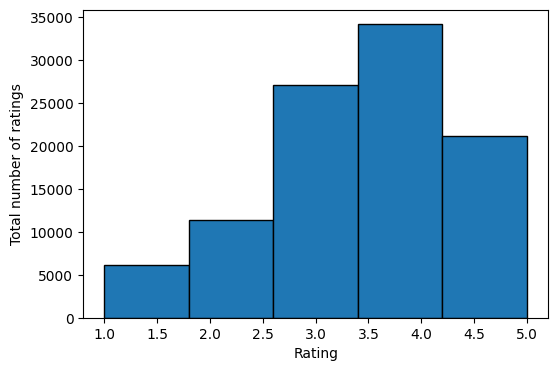

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.hist(cleaned_data['rating'],edgecolor="black",bins = 5)
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.show()

Univariate plot of the attributes: 'Age'

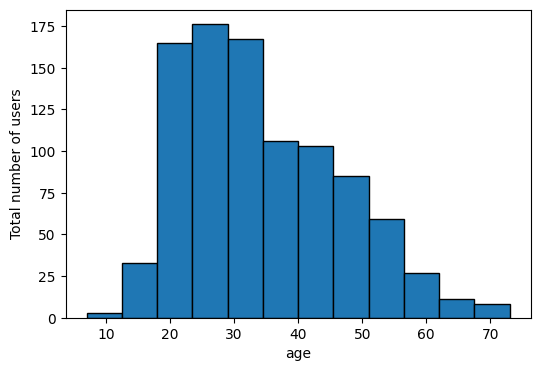

In [ ]:
cleaned_data2 = cleaned_data.drop_duplicates(subset=['user id'], keep='first')
fig = plt.figure(figsize=(6,4))
plt.hist(cleaned_data2['age'],edgecolor="black",bins = 12)
plt.xlabel('age')
plt.ylabel('Total number of users')
plt.show()

Univariate plot of the attributes: 'Release date'

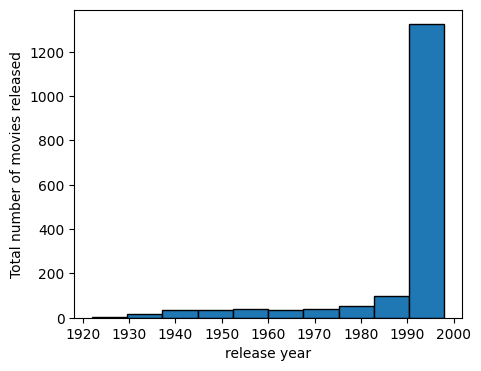

In [ ]:
cleaned_data3 = cleaned_data.drop_duplicates(subset=['movie id'], keep='first')
fig = plt.figure(figsize=(5,4))
plt.hist(cleaned_data3['year'],edgecolor="black",bins = 10)
plt.xlabel('release year')
plt.ylabel('Total number of movies released')
plt.show()

Univariate plot of the attributes: 'Gender'

In [ ]:
cleaned_data2['gender'].value_counts('M')*100

gender
M    71.049841
F    28.950159
Name: proportion, dtype: float64

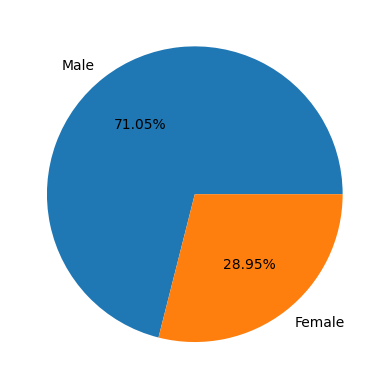

In [ ]:
sizes = [71.05,28.95]
labels = ['Male','Female']
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.show()

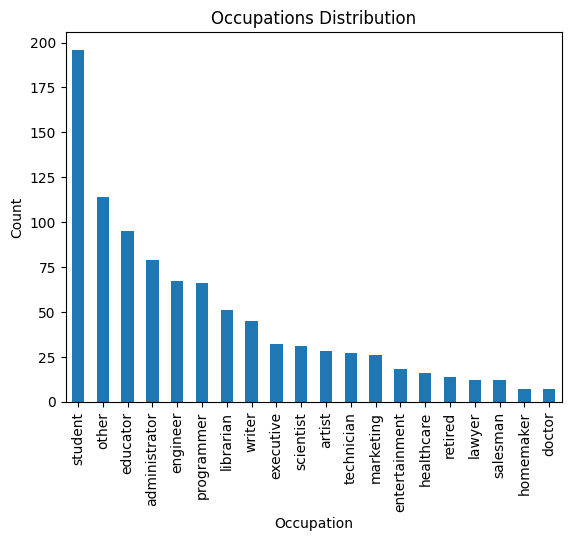

In [ ]:
occupation_counts=cleaned_data2['occupation'].value_counts()
occupation_counts.plot(kind='bar', xlabel='Occupation', ylabel='Count', title='Occupations Distribution')
plt.show()

# Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.

In [ ]:
grouped = cleaned_data3.loc[:,['unknown', 'Action',
       'Adventure', ' Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'year',
       ]]
grouped

In [ ]:
genre_counts = grouped.groupby('year').sum()
genre_counts.sort_values(by='year',ascending=False)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1998.0,0,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0
1997.0,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1996.0,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1995.0,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1994.0,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1931.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1930.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


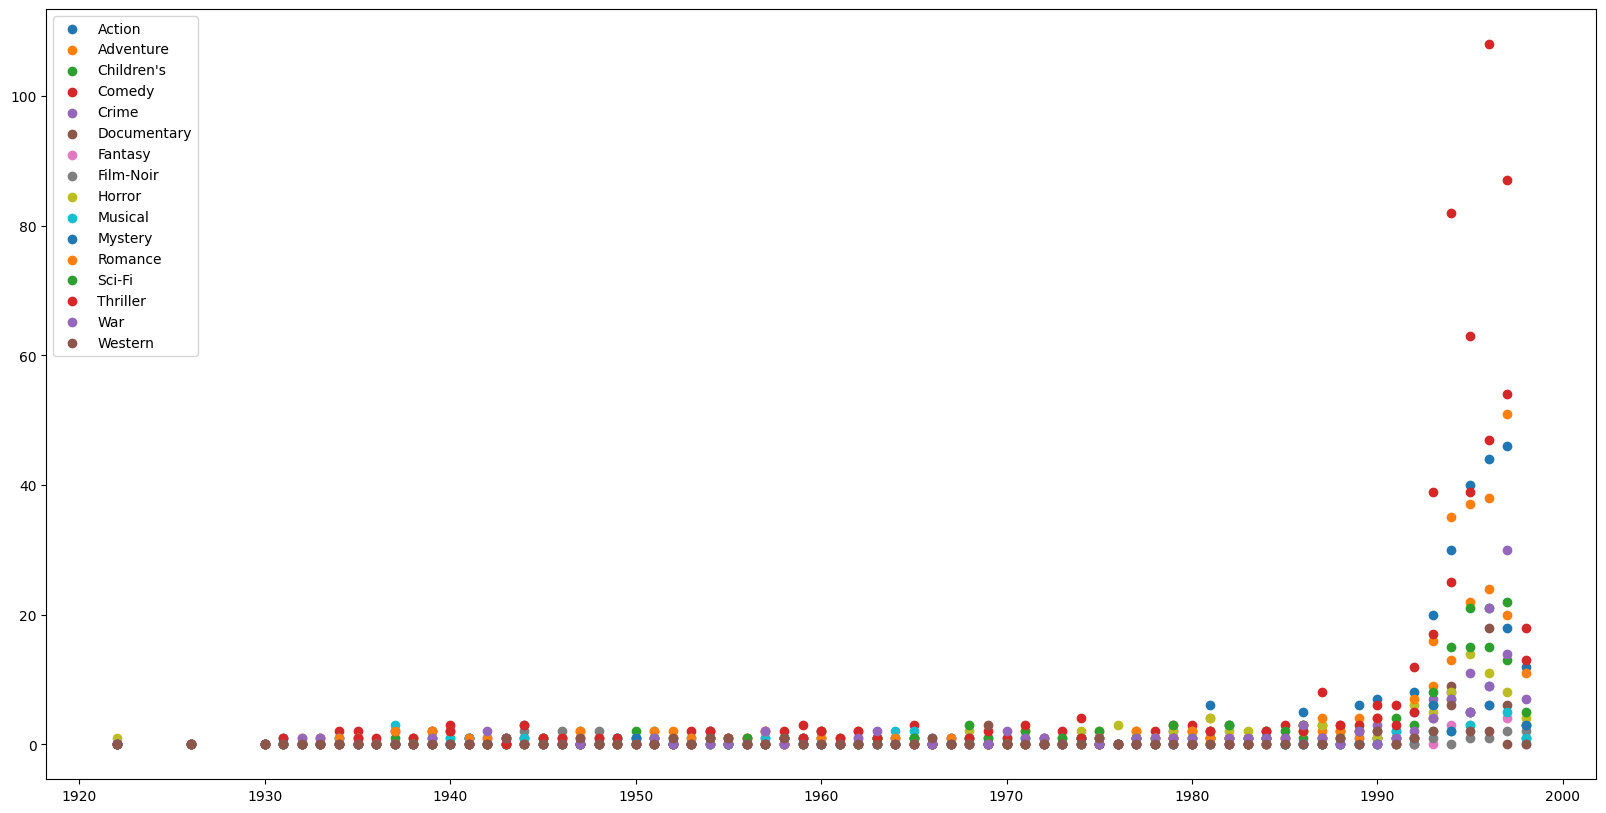

In [ ]:
genres = genre_counts.columns
plt.figure(figsize=(20,10))
plt.scatter(genre_counts.index,genre_counts['Action'])
plt.scatter(genre_counts.index,genre_counts['Adventure'])
plt.scatter(genre_counts.index,genre_counts["Children's"])
plt.scatter(genre_counts.index,genre_counts['Comedy'])
plt.scatter(genre_counts.index,genre_counts['Crime'])
plt.scatter(genre_counts.index,genre_counts['Documentary'])
plt.scatter(genre_counts.index,genre_counts['Fantasy'])
plt.scatter(genre_counts.index,genre_counts['Film-Noir'])
plt.scatter(genre_counts.index,genre_counts['Horror'])
plt.scatter(genre_counts.index,genre_counts['Musical'])
plt.scatter(genre_counts.index,genre_counts['Mystery'])
plt.scatter(genre_counts.index,genre_counts['Romance'])
plt.scatter(genre_counts.index,genre_counts['Sci-Fi'])
plt.scatter(genre_counts.index,genre_counts['Thriller'])
plt.scatter(genre_counts.index,genre_counts['War'])
plt.scatter(genre_counts.index,genre_counts['Western'])
plt.legend(loc='best',labels=['Action','Adventure',"Children's",'Comedy','Crime','Documentary','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])

# Display the top 25 movies by average rating, as a list/series/dataframe.
# Note:- Consider only the movies which received atleast a 100 ratings

In [ ]:
data4 = cleaned_data.iloc[:,:4]

In [ ]:
average_ratings = data4.groupby('movie title')['rating'].agg(['mean', 'count'])

In [ ]:
average_ratings = data4.groupby('movie title')['rating']
average_ratings

In [ ]:
popular_movies = average_ratings[average_ratings['count'] > 100]

In [ ]:
top_movies = popular_movies.sort_values(by='mean', ascending=False)

In [ ]:
top_25_movies = top_movies.head(25)

In [ ]:
top_25_movies = top_25_movies['mean']

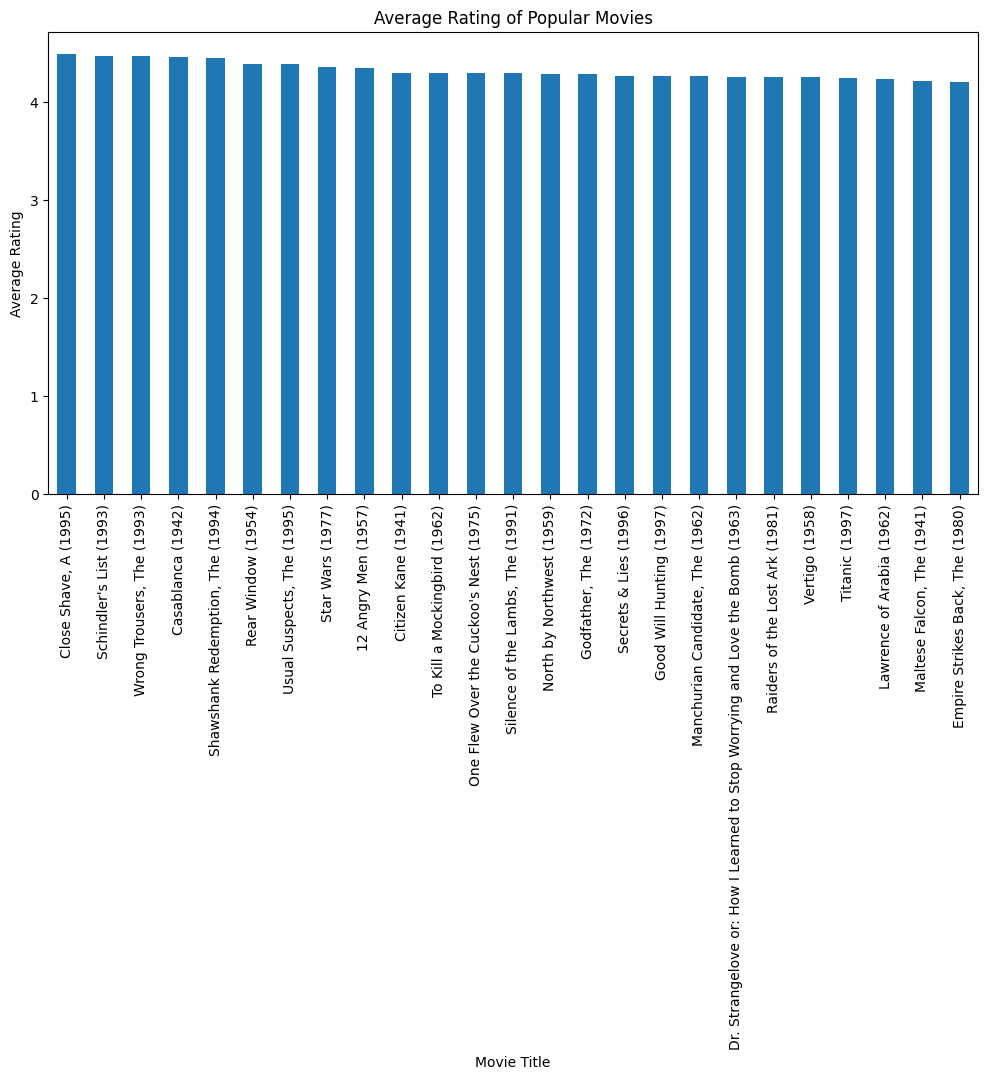

In [ ]:
plt.figure(figsize=(12, 6))
top_25_movies.plot(kind='bar')
plt.title('Average Rating of Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Verify the following statements (no need of doing a statistical test. Compare absolute numbers):

 1. Men watch more drama than women
 2. Men watch more Romance than women
 3. Women watch more Sci-Fi than men

In [ ]:
data5 = cleaned_data.loc[:,['Drama','Romance','Sci-Fi','gender']]

In [ ]:
data5.groupby('gender')['Drama'].value_counts()

gender  Drama
F       0        14730
        1        11008
M       0        45366
        1        28887
Name: count, dtype: int64

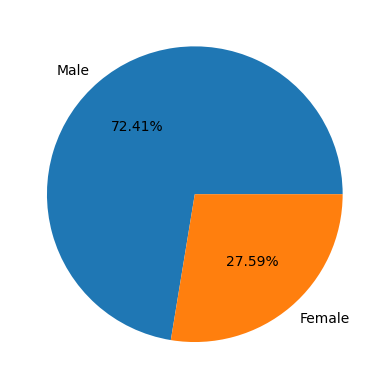

In [ ]:
sizes = [72.40,27.59]
labels = ['Male','Female']
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.show()

1. Yes, Men watch more drama than women

In [ ]:
data5.groupby('gender')['Romance'].value_counts()

gender  Romance
F       0          19880
        1           5858
M       0          60650
        1          13603
Name: count, dtype: int64

In [ ]:
val_F = 5858/(5858+13603)
val_M = 13603/(5858+13603)
val_M

0.6989877190277992

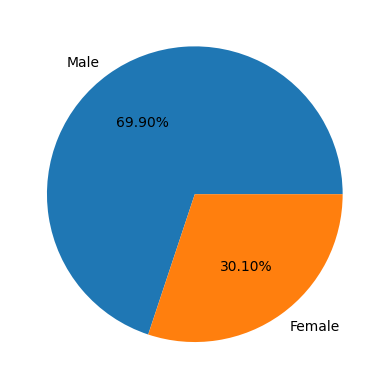

In [ ]:
sizes = [69.89,30.10]
labels = ['Male','Female']
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.show()

2. Yes, Men watch more romance than women

In [ ]:
data5.groupby('gender')['Sci-Fi'].value_counts()

gender  Sci-Fi
F       0         23109
        1          2629
M       0         64152
        1         10101
Name: count, dtype: int64

In [ ]:
val_F = 2629/(2629+10101)
val_M = 10101/(2629+10101)
val_M

0.7934799685781618

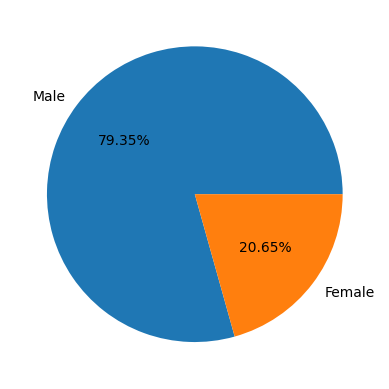

In [ ]:
sizes = [79.34,20.65]
labels = ['Male','Female']
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.show()

3. No, Women do not watches more Sci-Fi than men